<a href="https://colab.research.google.com/github/Utkaaarsh/Time_series_forcast/blob/main/timeseriesforecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install numpy

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten


In [3]:
# preparing independent & dependent features
def prepare_data(timeseries_data, n_features):
  X,y = [],[]
  for i in range(len(timeseries_data)):
    end_ix = i + n_features # 0->3 ,1->4, 2->5
    if end_ix > len(timeseries_data) - 1:
      break
    # gathering input & output parts of the pattern
    seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)


In [4]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]

# choose a number of time steps
n_steps = 3

#splitting into samples
X, y = prepare_data(timeseries_data, n_steps)


In [5]:
print(X)
print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


In [6]:
X.shape , y.shape

((6, 3), (6,))

In [7]:
#reshaping [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape(X.shape[0], X.shape[1], n_features)

In [8]:
X.shape


(6, 3, 1)

Building a LSTM Model

In [9]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

#fit model
model.fit(X, y, epochs=300, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Predicting for next 10 days

In [10]:
x_input = np.array([187, 196, 210])
temp_input = list(x_input)
lst_output = []
i=0
while(i<10):
  if (len(temp_input) > 3):
    x_input = np.array(temp_input[1:])
    #printing x_input
    print('{} day input: {}'.format(i, x_input))
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    print('{} day output: {}'.format(i, yhat[0][0]))
    print()
    temp_input.append(yhat[0][0])
    temp_input = temp_input[1:]
    #printing temp_input
    lst_output.append(yhat[0][0])
    i = i+1

  else:
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    #print(yhat.shape)
    #print(yhat[0][0])
    temp_input.append(yhat[0][0])
    lst_output.append(yhat[0][0])
    i = i+1

1 day input: [196.         210.         223.79199219]
1 day output: 234.9921875

2 day input: [210.         223.79199219 234.9921875 ]
2 day output: 248.8934783935547

3 day input: [223.79199 234.99219 248.89348]
3 day output: 262.36102294921875

4 day input: [234.99219 248.89348 262.36102]
4 day output: 275.5837097167969

5 day input: [248.89348 262.36102 275.5837 ]
5 day output: 290.0932312011719

6 day input: [262.36102 275.5837  290.09323]
6 day output: 304.6112365722656

7 day input: [275.5837  290.09323 304.61124]
7 day output: 319.6116943359375

8 day input: [290.09323 304.61124 319.6117 ]
8 day output: 335.3854064941406

9 day input: [304.61124 319.6117  335.3854 ]
9 day output: 351.5588073730469



In [11]:
import matplotlib.pyplot as plt


In [ ]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [12]:
lst_output

[223.79199,
 234.99219,
 248.89348,
 262.36102,
 275.5837,
 290.09323,
 304.61124,
 319.6117,
 335.3854,
 351.5588]

In [13]:
day_new = np.arange(1,10)
day_pred = np.arange(10,20)


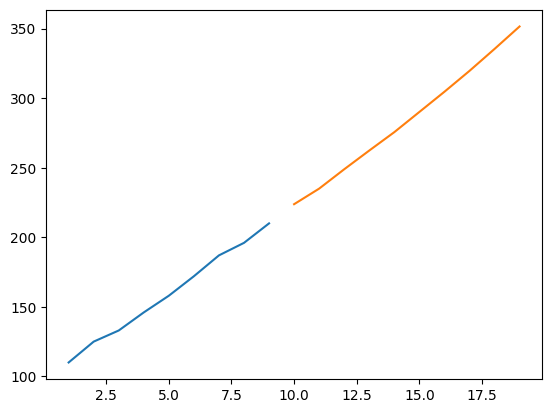

In [14]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred, lst_output)